📈 Monthly Sales Trend Analysis:


,order_year,order_month,total_revenue,total_orders
0,2024,01,2691.25,3
1,2024,02,3790.25,3
2,2024,03,2906.25,2
3,2024,04,4050.00,2
4,2024,05,3451.00,2
5,2024,06,4180.50,2
6,2024,07,3840.00,2
7,2024,08,5140.00,2
8,2024,09,3610.00,2
9,2024,10,5050.00,2


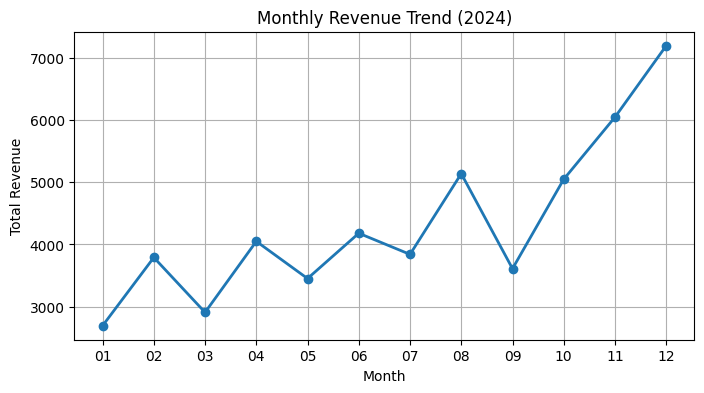

In [9]:


import sqlite3
import pandas as pd

# Step 1: Create SQLite in-memory database
conn = sqlite3.connect(':memory:')

#  Step 2: Create sample dataset
data = [
    (1001, '2024-01-05', 1200.50, 11),
    (1002, '2024-01-12', 850.00, 12),
    (1003, '2024-01-25', 640.75, 13),
    (1004, '2024-02-02', 1500.00, 11),
    (1005, '2024-02-10', 950.25, 14),
    (1006, '2024-02-28', 1340.00, 12),
    (1007, '2024-03-03', 1780.75, 13),
    (1008, '2024-03-15', 1125.50, 15),
    (1009, '2024-04-01', 2100.00, 16),
    (1010, '2024-04-10', 1950.00, 17),
    (1011, '2024-05-05', 1600.25, 18),
    (1012, '2024-05-20', 1850.75, 19),
    (1013, '2024-06-02', 2200.00, 20),
    (1014, '2024-06-15', 1980.50, 21),
    (1015, '2024-07-05', 2100.00, 11),
    (1016, '2024-07-18', 1740.00, 14),
    (1017, '2024-08-09', 2500.00, 22),
    (1018, '2024-08-22', 2640.00, 23),
    (1019, '2024-09-02', 1750.00, 24),
    (1020, '2024-09-21', 1860.00, 25),
    (1021, '2024-10-01', 2400.00, 11),
    (1022, '2024-10-10', 2650.00, 12),
    (1023, '2024-11-05', 3100.00, 13),
    (1024, '2024-11-25', 2950.00, 14),
    (1025, '2024-12-12', 3500.00, 15),
    (1026, '2024-12-28', 3700.00, 16)
]

#  Step 3: Create table and insert data
conn.execute("""
CREATE TABLE online_sales (
    order_id INTEGER,
    order_date TEXT,
    amount REAL,
    product_id INTEGER
)
""")
conn.executemany('INSERT INTO online_sales VALUES (?, ?, ?, ?)', data)
conn.commit()

# Step 4: SQL Query for Sales Trend Analysis
query = """
SELECT
    strftime('%Y', order_date) AS order_year,
    strftime('%m', order_date) AS order_month,
    SUM(amount) AS total_revenue,
    COUNT(DISTINCT order_id) AS total_orders
FROM online_sales
GROUP BY order_year, order_month
ORDER BY order_year, order_month;
"""

#  Step 5: Run query and show results
result = pd.read_sql_query(query, conn)
print("📈 Monthly Sales Trend Analysis:")
display(result)

# Step 6: Optional — Plot Trend
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(result['order_month'], result['total_revenue'], marker='o', linewidth=2)
plt.title('Monthly Revenue Trend (2024)')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()
